# P4W1: Discriminantanalyse

In [2]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

## 1. Biopsy dataset

In [3]:

biopsy = pd.read_csv('../../oefeningen/DataSets/biopsy.csv',delimiter=';')
biopsy.info()
biopsy['class'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      699 non-null    int64  
 1   V1      699 non-null    int64  
 2   V2      699 non-null    int64  
 3   V3      699 non-null    int64  
 4   V4      699 non-null    int64  
 5   V5      699 non-null    int64  
 6   V6      683 non-null    float64
 7   V7      699 non-null    int64  
 8   V8      699 non-null    int64  
 9   V9      699 non-null    int64  
 10  class   699 non-null    object 
dtypes: float64(1), int64(9), object(1)
memory usage: 60.2+ KB


array(['benign', 'malignant'], dtype=object)

<Figure size 640x480 with 0 Axes>

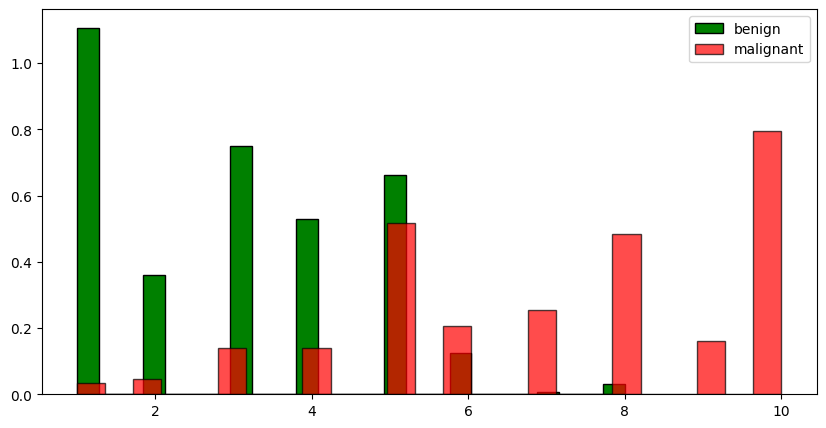

In [20]:
feature = "V1"
plt.figure()
fig, ax = plt.subplots(figsize=(10,5))
biopsy[feature][biopsy['class'] == 'benign'].hist(ax=ax, bins=25, density = True, edgecolor='black', color='green', label='benign')
biopsy[feature][biopsy['class'] == 'malignant'].hist(ax=ax, bins=25, density = True, edgecolor='black', color='red', alpha=0.7, label='malignant')
ax.legend()
ax.grid(False)
plt.show()

## 2. Train model

In [5]:
### Descriptive discriminant analysis ###
X = biopsy[['V1','V2', 'V3']]
y = biopsy['class']
lda = LinearDiscriminantAnalysis()
lda.fit(X,y)

LinearDiscriminantAnalysis()

In [6]:
print(lda.classes_) # classes: values of the dependent variable
print(lda.priors_)  #The prior probability is the probability of an observation coming from a particular group in a simple random sample with replacement.
print(lda.explained_variance_ratio_) #how much of the variance is explained by each of the discriminant functions (only useful when there are several discriminant functions

['benign' 'malignant']
[0.65522175 0.34477825]
[1.]


In [7]:
# lda.priors_
print( len(y[y == "benign"]) / len(y) )
print( len(y[y == "malignant"]) / len(y) )

0.6552217453505007
0.3447782546494993


In [8]:
def LDA_coefficients(X,lda):
    nb_col = X.shape[1]
    matrix= np.zeros((nb_col+1,nb_col), dtype=int)
    Z=pd.DataFrame(data=matrix,columns=X.columns)
    for j in range(0,nb_col):
        Z.iloc[j,j] = 1
    LD = lda.transform(Z)
    nb_funct= LD.shape[1]
    results = pd.DataFrame();
    index = ['const']
    for j in range(0,LD.shape[0]-1):
        index = np.append(index,'C'+str(j+1))
    for i in range(0,LD.shape[1]):
        coef = [LD[-1][i]]
        for j in range(0,LD.shape[0]-1):
            coef = np.append(coef,LD[j][i]-LD[-1][i])
        result = pd.Series(coef)
        result.index = index
        column_name = 'LD' + str(i+1)
        results[column_name] = result
    return results

In [9]:
# coefficients of the discriminant function
# discriminantfunctie = C1 * V1 + C2 * V2 + C3 * V3 + const
result = LDA_coefficients(X,lda)
print(LDA_coefficients(X,lda)) 

            LD1
const -2.634744
C1     0.232149
C2     0.257481
C3     0.250077


<Figure size 640x480 with 0 Axes>

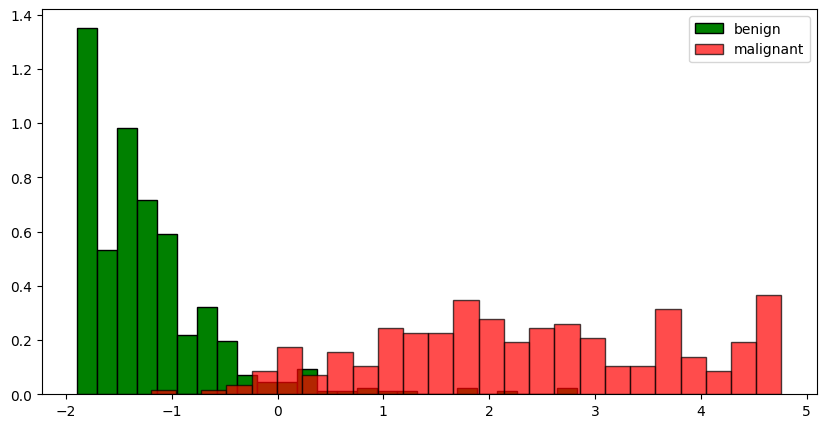

In [10]:
# map the independent variables based on the discriminant functions of the model to their N discriminant values
# biopsy["LD1"] =  -2.634744 + 0.232149 * X.V1 + 0.257481 * X.V2 + 0.250077 * X.V3
biopsy["LD1"] = lda.transform(X)[:,0]   # shape of transform = (699,1)
# plot
plt.figure()
fig, ax = plt.subplots(figsize=(10,5))
biopsy['LD1'][biopsy['class'] == 'benign'].hist(ax=ax, bins=25, density = True, edgecolor='black', color='green', label='benign')
biopsy['LD1'][biopsy['class'] == 'malignant'].hist(ax=ax, bins=25, density = True, edgecolor='black', color='red', alpha=0.7, label='malignant')
ax.legend()
ax.grid(False)
plt.show()

## 3. Predict

In [11]:
### Predictive discriminant analysis ###
print( lda.predict([[5,6,8]]) )
print( lda.predict_proba([[5,6,8]]) )

['malignant']
[[0.0080211 0.9919789]]


C:\Users\robbe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
C:\Users\robbe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


In [12]:
lda.predict(X) # output:  ['benign' 'benign' 'benign' 'malignant', … ]
lda.predict_proba(X) # output: [[0.99 0.01],[0.65 0.35],[1.   0.  ],...,[0.01 0.99]]

array([[9.97899809e-01, 2.10019056e-03],
       [6.59174524e-01, 3.40825476e-01],
       [9.99607241e-01, 3.92758792e-04],
       ...,
       [3.20431130e-05, 9.99967957e-01],
       [1.74295687e-02, 9.82570431e-01],
       [2.90066726e-03, 9.97099333e-01]])

In [13]:
# Accuracy = aantal juist voorspeld / totaal
# Accuracy = (448 + 208) / 699
lda.score(X,y)

0.9384835479256081

In [14]:
# Confusion metrics
predicted = pd.Series(lda.predict(X), name='predicted')
actual = y.rename('actual')
pd.crosstab(index=actual, columns=predicted, margins='all',margins_name='total')

predicted,benign,malignant,total
actual,,,
benign,448,10,458
malignant,33,208,241
total,481,218,699


## 4. Alternatief: decision tree

In [15]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X,y)
dt.score(X,y)

0.9856938483547926

In [16]:
predicted = dt.predict(X)
pd.crosstab(index=actual, columns=predicted, margins='all',margins_name='total')

col_0,benign,malignant,total
actual,,,
benign,455,3,458
malignant,7,234,241
total,462,237,699
